<h1 style="background-color:Tomato;">Random Forest Exercises</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import env
import acquire


import warnings
warnings.filterwarnings("ignore")


#### 1 /   Fit the Random Forest Classifier to your training sample and transform (i.e, make predictions on the training sample), setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.  
Use Titanic dataset.


    

In [2]:
tati = pd.read_csv('titanic.csv')
tati.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
tati.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [4]:
to_drop = ['deck', 'Unnamed: 0', 'age', 'embarked', 'passenger_id', 'class']

# indicating which unnecessary or superfluous columns to drop

In [5]:
tati.drop(columns = to_drop, inplace = True)

# dropping unnecessary or superfluous columns

In [6]:
tati = tati.dropna()
tati.info()

# alternate way to drop rows with nulls :
# tati[~tati.embarked.isna()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   sibsp        889 non-null    int64  
 4   parch        889 non-null    int64  
 5   fare         889 non-null    float64
 6   embark_town  889 non-null    object 
 7   alone        889 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 62.5+ KB


In [7]:
# baseline for survival is to die (ie, ['survived'] == '0').

tati[tati.survived == 0]

tati.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


In [8]:
tati['survival_baseline'] = 0
tati.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,survival_baseline
0,0,3,male,1,0,7.2500,Southampton,0,0
1,1,1,female,1,0,71.2833,Cherbourg,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0
3,1,1,female,1,0,53.1000,Southampton,0,0
4,0,3,male,0,0,8.0500,Southampton,1,0


In [9]:
# Boolean baseline (T = 1, F = 0)

(tati['survival_baseline'] == tati['survived']).mean()


0.6175478065241845

In [10]:
# creating dummies in order to help machine learning

tatdum = pd.get_dummies(tati[['embark_town', 'sex']], drop_first = True)

tatdum.head()

,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,1,1
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,1


In [11]:
# now that we have the DF and the dummies, use concatenation to join the two :

pd.concat([tati, tatdum], axis = 1)

# assigning it a variable for permanence

tati = pd.concat([tati, tatdum], axis = 1)
tati.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,survival_baseline,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,3,male,1,0,7.2500,Southampton,0,0,0,1,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1,0
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1,0
4,0,3,male,0,0,8.0500,Southampton,1,0,0,1,1


In [12]:
tati.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 889 non-null    int64  
 1   pclass                   889 non-null    int64  
 2   sex                      889 non-null    object 
 3   sibsp                    889 non-null    int64  
 4   parch                    889 non-null    int64  
 5   fare                     889 non-null    float64
 6   embark_town              889 non-null    object 
 7   alone                    889 non-null    int64  
 8   survival_baseline        889 non-null    int64  
 9   embark_town_Queenstown   889 non-null    uint8  
 10  embark_town_Southampton  889 non-null    uint8  
 11  sex_male                 889 non-null    uint8  
dtypes: float64(1), int64(6), object(2), uint8(3)
memory usage: 72.1+ KB


In [13]:
# dropping columns for machine learning purposes (don't do this for exploration purposes)

tati = tati.drop(columns = ['embark_town', 'sex'], axis = 1)
tati.columns

Index(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'alone',
       'survival_baseline', 'embark_town_Queenstown',
       'embark_town_Southampton', 'sex_male'],
      dtype='object')

In [14]:
# setting the 'survived' column to Boolean T / F
tati['survived'] = np.where(tati['survived'] == True, '1', '0')

In [15]:
tati['survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 889, dtype: object

In [16]:
def train_val_test(df, target, seed = 23):
    
    train, val_test = train_test_split(df, train_size = 0.7, 
                                       random_state = seed, 
                                       stratify = df[target])
    
    val, test = train_test_split(val_test, train_size = 0.5, 
                                 random_state = seed, 
                                 stratify = val_test[target])
    
    return train, val, test

## function to train, validate, test data

In [17]:
train, val, test  = train_val_test(tati, 'survived')

train.shape, val.shape, test.shape

# returning the data shapes / sizes to be trained, validated, tested

((622, 10), (133, 10), (134, 10))

In [18]:
# split train, val, test into X_train, X_val, X_test (feature DF, exludes var 'survived') and y-train, etc

# y_train is only our target

# X_train is everything except for 'survived'

X_train = train.drop(columns = ['survived'])
y_train = train['survived']


X_val = val.drop(columns = ['survived'])
y_val = val['survived']


X_test = test.drop(columns = ['survived'])
y_test = test['survived']

In [19]:
seed = 23

In [20]:
tita_rf = RandomForestClassifier(max_depth = 10,       # RFC will have 10 nodes.
                                 random_state = seed, 
                                 min_samples_leaf = 1, # Minimum number of samples required at a leaf node : 1.
                                 max_samples = 0.5)
                                         # 50pc of all observations will be placed into each random sample


In [21]:
tita_rf.fit(X_train, y_train)

# training the random forest on the data

RandomForestClassifier(max_depth=10, max_samples=0.5, random_state=23)

### 2 / Evaluate your results using the model score, confusion matrix, and classification report.

   

**MODEL SCORE**

In [22]:
# 'tita_rf.score' tells us how accurate our model is. 

tita_acc = tita_rf.score(X_train, y_train)
tita_acc

# scoring the accuracy of the training set : 90pc accuracy
# the X_train data is compared against y_train 

0.9003215434083601

In [23]:
X_train.columns

Index(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'survival_baseline',
       'embark_town_Queenstown', 'embark_town_Southampton', 'sex_male'],
      dtype='object')

In [24]:
importance_df = pd.DataFrame({'feature': X_train.columns.tolist(),  
                     # naming X_train features, sending them to a list
                              
                             'importance': tita_rf.feature_importances_}) 
                     # pairing the order of features in X_train with the corresponding feature importance
    

In [25]:
importance_df.sort_values('importance', ascending = False)

# This would indicate that 'fare', followed by sex (unclear if 'sex_male' shows 0 or 1) 
# and passenger class have the highest impact on survival

,feature,importance
3,fare,0.402086
8,sex_male,0.285079
0,pclass,0.117919
1,sibsp,0.056902
2,parch,0.056585
7,embark_town_Southampton,0.040411
4,alone,0.025622
6,embark_town_Queenstown,0.015398
5,survival_baseline,0.000000


In [26]:
X_train['sex_male'].value_counts()

# checking to see what 'sex_male' contains : 1 = male (count 401), 0 = female (count 221)

1    401
0    221
Name: sex_male, dtype: int64

In [27]:
tita_rf.score(X_val, y_val)

# scoring the accuracy of the validation dataset : 80.5pc accuracy

0.8045112781954887

In [28]:
tita_rf.feature_importances_

# the importance in dataset features, in pc

array([0.11791882, 0.05690187, 0.05658476, 0.40208554, 0.02562173,
       0.        , 0.0153976 , 0.0404107 , 0.28507899])

**CONFUSION MATRIX**

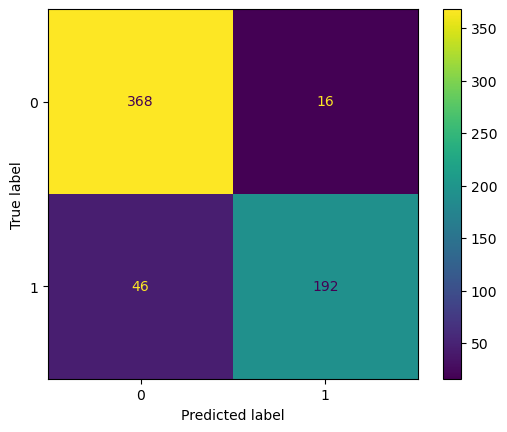

In [29]:
## plotting teh confusion matrix of tita_rf

plot_confusion_matrix(tita_rf, X_train, y_train)

# (prediction-model, X_train, y_train)

In [30]:
# y predictions based on X_train

y_preds = tita_rf.predict(X_train)

In [31]:
# returning the confusion matrix as an array

confusion_matrix(y_preds, y_train)


array([[368,  46],
       [ 16, 192]])

In [55]:
# assigning confusion matrix values to appropriate variables

TN, FP, FN, TP = confusion_matrix(y_train, y_preds).ravel()


TN, FP, FN, TP

(347, 37, 69, 169)

**CLASSIFICATION REPORT**

In [33]:
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       384
           1       0.92      0.81      0.86       238

    accuracy                           0.90       622
   macro avg       0.91      0.88      0.89       622
weighted avg       0.90      0.90      0.90       622



In [34]:
print(f'The baseline accuracy for non-survival in all cases on the Titanic is {round(tita_acc, 4).mean()}')

The baseline accuracy for non-survival in all cases on the Titanic is 0.9003


### 3 /  Print and clearly label the following : 
Accuracy, true positive rate / recall, false positive rate, true negative rate, false negative rate, precision, f1-score and support.  

**Overall accuracy**   
ACC = (TP+TN)/(TP+FP+FN+TN)  
**Sensitivity, hit rate, recall, or true positive rate**  
TPR = TP/(TP+FN)  
**Fall out or false positive rate**  
FPR = FP/(FP+TN)  
**Specificity or true negative rate**  
TNR = TN/(TN+FP)   
**Negative predictive value**  
NPV = TN/(TN+FN)  
**False negative rate**  
FNR = FN/(TP+FN)  
**False discovery rate**  
FDR = FP/(TP+FP)  
**Precision or positive predictive value**  
PPV = TP/(TP+FP)  

In [35]:
# Accuracy

print(f'The accuracy is {sklearn.metrics.accuracy_score(y_train, y_preds)}.')


The accuracy is 0.9003215434083601.


In [36]:
# sensitivity / true positive rate / recall

print(f'The recall is {sklearn.metrics.recall_score(y_train, y_preds, average = None)}.')

The recall is [0.95833333 0.80672269].


In [56]:
# false negative rate

print(f'The false negative rate is {FN / (TP + FN)}.')

The false negative rate is 0.28991596638655465.


In [38]:
# precision / PPV

print(f'The precision rate is {sklearn.metrics.precision_score(y_train, y_preds, average = None)}.')

The precision rate is [0.88888889 0.92307692].


In [57]:
# support

support_pos = TP + FN ## positive cases
support_neg = FP + TN ## negative cases

support_pos, support_neg, y_train.value_counts()

(238,
 384,
 0    384
 1    238
 Name: survived, dtype: int64)

In [40]:
# f1 score

print(f'The f1 score is {sklearn.metrics.f1_score(y_train, y_preds, average = None)}.')

The f1 score is [0.92230576 0.86098655].


In [41]:
# support

print(f'The support is {sklearn.metrics.precision_recall_fscore_support(y_train, y_preds, average = None)}.')

The support is (array([0.88888889, 0.92307692]), array([0.95833333, 0.80672269]), array([0.92230576, 0.86098655]), array([384, 238])).


In [58]:
## NVP / negative predicted value
print(f'The NVP is {TN / (TN + FN)}.')

The NVP is 0.8341346153846154.


In [43]:
# make a loop
for i in range(1, 11):
    
    trees = DecisionTreeClassifier(max_depth = i, random_state = seed, min_samples_leaf = i)
    
    trees = trees.fit(X_train, y_train)
    
    y_preds = trees.predict(X_train)
    
    report = classification_report(y_train, y_preds, output_dict = True)
    
    
    print(' ')
    print(f'Tree with minimum samples leaf of {i}.')
    print(' ')
    print(pd.DataFrame(report))

 
Tree with minimum samples leaf of 1.
 
                    0           1  accuracy   macro avg  weighted avg
precision    0.807980    0.728507  0.779743    0.768243      0.777571
recall       0.843750    0.676471  0.779743    0.760110      0.779743
f1-score     0.825478    0.701525  0.779743    0.763501      0.778049
support    384.000000  238.000000  0.779743  622.000000    622.000000
 
Tree with minimum samples leaf of 2.
 
                    0           1  accuracy   macro avg  weighted avg
precision    0.752988    0.950000  0.790997    0.851494      0.828372
recall       0.984375    0.478992  0.790997    0.731683      0.790997
f1-score     0.853273    0.636872  0.790997    0.745072      0.770470
support    384.000000  238.000000  0.790997  622.000000    622.000000
 
Tree with minimum samples leaf of 3.
 
                    0           1  accuracy   macro avg  weighted avg
precision    0.813397    0.784314  0.803859    0.798855      0.802269
recall       0.885417    0.672269  0.


###   4 /  Run through steps increasing your min_samples_leaf and decreasing your max_depth.

   


In [44]:
tita_rf15 = RandomForestClassifier(max_depth = 6,         # RFC will have 6 nodes
                                 random_state = seed, 
                                 min_samples_leaf = 15, # Min number of samples at a leaf node : 15
                                 max_samples = 0.5)
                                            # 50pc of all observations will be placed into each random sample


In [45]:
tita_rf15.fit(X_train, y_train)

# training the random forest on the data

RandomForestClassifier(max_depth=6, max_samples=0.5, min_samples_leaf=15,
                       random_state=23)

In [46]:
# 'tita_rf.score' tells us how accurate our model is. 

tita_accuracy15 = tita_rf15.score(X_train, y_train)
tita_accuracy15

# scoring the accuracy of the training set : 81.19pc accuracy
# the X_train data is compared against y_train 

0.8118971061093248

In [47]:
importance_df15 = pd.DataFrame({'feature': X_train.columns.tolist(),  
                     # naming X_train features, sending them to a list
                              
                             'importance': tita_rf15.feature_importances_}) 
                     # pairing the order of features in X_train with the corresponding feature importance

    
    
importance_df15.sort_values('importance', ascending = False)

# This would indicate that 'sex_male', followed by passenger class and fare, still 
# have the highest impact on survival, and by a significant amount, though the order has changed

,feature,importance
8,sex_male,0.467667
0,pclass,0.210906
3,fare,0.205339
7,embark_town_Southampton,0.037666
4,alone,0.037147
1,sibsp,0.020696
2,parch,0.015038
6,embark_town_Queenstown,0.005540
5,survival_baseline,0.000000


In [48]:
tita_rf15.score(X_val, y_val)

# scoring the accuracy of the validation dataset : 78.9pc accuracy

0.7894736842105263

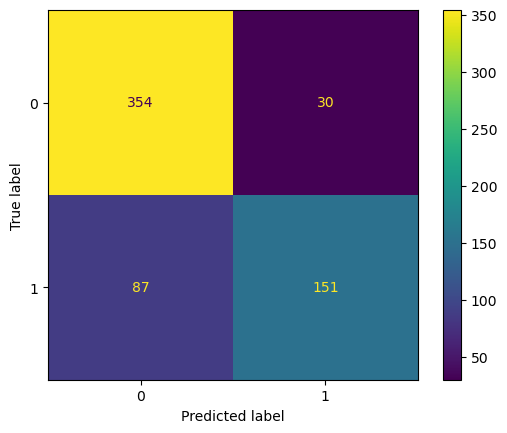

In [49]:
## plotting the confusion matrix of tita_rf15

plot_confusion_matrix(tita_rf15, X_train, y_train)

# 'plot_confusion_matrix(prediction-model, X_train, y_train)'

In [50]:
# y predictions based on X_train

y_preds15 = tita_rf15.predict(X_train)

In [51]:
# returning the confusion matrix as an array

confusion_matrix(y_preds15, y_train)


array([[354,  87],
       [ 30, 151]])

In [59]:
# assigning confusion matrix values to appropriate variables

TN15, FP15, FN15, TP15 = confusion_matrix(y_train, y_preds15).ravel()
TN15, FP15, FN15, TP15

(354, 30, 87, 151)

In [65]:
print(classification_report(y_train, y_preds15))
print('-.-.-.-.-.-')
print((f'The baseline accuracy for non-survival in all cases on the Titanic is {round(tita_accuracy15, 4).mean()}'))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       384
           1       0.83      0.63      0.72       238

    accuracy                           0.81       622
   macro avg       0.82      0.78      0.79       622
weighted avg       0.81      0.81      0.81       622

-.-.-.-.-.-
The baseline accuracy for non-survival in all cases on the Titanic is 0.8119


In [61]:
# Accuracy

sklearn.metrics.accuracy_score(y_train, y_preds15)


0.8118971061093248

In [62]:
# sensitivity / true positive rate / recall

sklearn.metrics.recall_score(y_train, y_preds15, average = None)

array([0.921875  , 0.63445378])

In [60]:
# false negative rate

FN15 / (TP15 + FN15)

0.36554621848739494

In [ ]:
# precision / PPV

sklearn.metrics.precision_score(y_train, y_preds15, average = None)

In [63]:
# support

support_pos15 = TP15 + FN15 ## positive cases
support_neg15 = FP15 + TN15 ## negative cases

support_pos15, support_neg15, y_train.value_counts()

(238,
 384,
 0    384
 1    238
 Name: survived, dtype: int64)

In [ ]:
# f1 score

sklearn.metrics.f1_score(y_train, y_preds15, average = None)

In [ ]:
# support

sklearn.metrics.precision_recall_fscore_support(y_train, y_preds15, average = None)

In [64]:
## NVP / negative predicted value

TN15 / (TN15 + FN15)

0.8027210884353742

In [ ]:
# make a loop
for i in range(1, 11):
    
    trees15 = DecisionTreeClassifier(max_depth = i, random_state = seed, min_samples_leaf = 15)
    
    trees15 = trees15.fit(X_train, y_train)
    
    y_preds15 = trees15.predict(X_train)
    
    report15 = classification_report(y_train, y_preds15, output_dict = True)
    
    
    print(' ')
    print(f'Tree with minimum samples leaf of {i}.')
    print(' ')
    print(pd.DataFrame(report15))

### 5 /  What are the differences in the evaluation metrics ? 
### Which performs better on your in-sample data ? Why ?

The model with 15 leafs has a much lower accuracy for prediciting survival (81.19pc vs 90.03pc for the original model).  

The  in-sample / training data.

In [ ]:
## A loop to compare out-of-sample with in-sample data

metrics = []


for i in range(1,max_depth):
    
    tree = DecisionTreeClassifier(max_depth = i, random_state = 23) ### make
    
    tree = tree.fit(X_train, y_train)  ## fit
    
    in_sample_accuracy = tree.score(X_train, y_train)
        # in-sample (train), out-of-sample (validate comparison ; could also be the 'test data')
        
    out_of_sample_accuracy = tree.score(X_val, y_val)
    
    output = { 'max_depth' : i, 
              "train_accuracy" : in_sample_accuracy, 
              "validate_accuracy" : out_of_sample_accuracy}
    
    metrics.append(output)

In [ ]:
# turn metrics into a df

df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy 

df
# compute diff btwn train accuracy and validation accuracy

After making a few models, which one has the best performance (or closest metrics) on both train and validate?
